# CA 2: Statistical Modelling & Inference
## COVID-19 Statistical Analysis

**Author:** [Your Name]  
**Date:** January 2025  
**Dataset:** Covid_stats_Jan2025.csv

---

## Introduction

This notebook presents a comprehensive statistical analysis of COVID-19 data across countries and continents. The analysis includes:

1. **Hypothesis Testing**: Using ANOVA and Chi-square tests to identify significant differences and associations
2. **Correlation Analysis**: Examining relationships between COVID-19 variables
3. **Regression Modeling**: Building predictive models to understand variable relationships

The analysis follows rigorous statistical methodology, including assumption checking and proper interpretation of results.

### Objectives

- Determine if death rates differ significantly across continents
- Identify associations between geographical location and disease severity
- Analyze correlations between cases, deaths, testing rates, and population metrics
- Build regression models to predict deaths from cases
- Provide actionable insights based on statistical findings

## Setup and Library Imports

Import all required libraries for data manipulation, statistical analysis, and visualization.

In [1]:
# Data manipulation and numerical computing
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical testing
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency, pearsonr, shapiro, levene

# Machine learning and regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Plotting Configuration

Set up consistent styling for all visualizations throughout the analysis.

In [2]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Set default figure size
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Set color palette
sns.set_palette("husl")

# Configure plot aesthetics
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['grid.alpha'] = 0.3

print("Plotting configuration complete!")

Plotting configuration complete!


## Methodology

### Statistical Significance Level

Throughout this analysis, we use a significance level of **α = 0.05**. This means:
- We reject the null hypothesis when p-value < 0.05
- We have 95% confidence in our conclusions
- There is a 5% chance of Type I error (false positive)

### Statistical Tests Used

1. **ANOVA (Analysis of Variance)**: To compare death rates across multiple continents
2. **Chi-Square Test**: To test association between categorical variables (continent and severity)
3. **Pearson Correlation**: To measure linear relationships between continuous variables
4. **Linear Regression**: To model and predict relationships between variables

### Assumptions

Each statistical test requires certain assumptions to be met. We will check these assumptions before interpreting results:
- **ANOVA**: Normality of distributions, homogeneity of variance
- **Regression**: Linearity, independence, homoscedasticity, normality of residuals

---
## Analysis Sections

The following sections will cover:
1. Data Loading and Preparation
2. Exploratory Data Analysis
3. Hypothesis Testing
4. Correlation Analysis
5. Regression Analysis
6. Conclusions and Recommendations

---
# Section 1: Data Loading and Initial Exploration

In this section, we load the COVID-19 dataset and perform initial inspection to understand the data structure, identify missing values, and examine basic statistics.

## 1.1 Load COVID-19 Dataset

We begin by loading the dataset from the CSV file and examining its basic structure.

In [3]:
# Load the COVID-19 dataset
# Note: Using encoding='ISO-8859-1' to handle special characters in the file
df = pd.read_csv('Covid_stats_Jan2025.csv', encoding='ISO-8859-1')

# Display dataset shape
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print("\n" + "="*80 + "\n")

# Display column names
print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Dataset Shape:
Rows: 231
Columns: 21


Column Names:
 1. Country,Other
 2. TotalCases
 3. NewCases
 4. TotalDeaths
 5. NewDeaths
 6. TotalRecovered
 7. NewRecovered
 8. ActiveCases
 9. Serious,Critical
10. TotÿCases/1M pop
11. Deaths/1M pop
12. TotalTests
13. Tests/
1M pop
14. Population
15. Continent
16. 1 Caseevery X ppl
17. 1 Deathevery X ppl
18. 1 Testevery X ppl
19. New Cases/1M pop
20. New Deaths/1M pop
21. Active Cases/1M pop


### First 5 Rows of the Dataset

In [4]:
# Display first 5 rows
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,"111,820,082",NaN,"1,219,487",NaN,"109,814,428",NaN,"786,167",940,"333,985",...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0.0,NaN,NaN,"2,348"
1,India,"45,035,393",NaN,"533,570",NaN,NaN,NaN,NaN,NaN,"32,016",...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2.0,NaN,NaN,0.4
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013",...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0.0,NaN,NaN,NaN
3,Germany,"38,828,995",NaN,"183,027",NaN,"38,240,600",NaN,"405,368",NaN,"462,891",...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1.0,NaN,NaN,"4,833"
4,Brazil,"38,743,918",NaN,"711,380",NaN,"36,249,161",NaN,"1,783,377",NaN,"179,908",...,"63,776,166","296,146","215,353,593",South America,6,303,3.0,NaN,NaN,"8,281"


### Last 5 Rows of the Dataset

In [5]:
# Display last 5 rows
print("Last 5 rows of the dataset:\n")
df.tail()

Last 5 rows of the dataset:



,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotÿCases/1M pop,...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
226,Tokelau,80,NaN,NaN,NaN,NaN,NaN,80,NaN,"58,055",...,NaN,NaN,"1,378",Australia/Oceania,17,NaN,NaN,NaN,NaN,"58,055"
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",...,NaN,NaN,799,Europe,28,NaN,NaN,NaN,NaN,NaN
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,...,NaN,NaN,"626,161",Africa,"62,616","626,161",NaN,NaN,NaN,NaN
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,Total:,"704,753,890",0.0,"7,010,681",0.0,"675,619,811",790.0,"22,123,398","34,794","90,413.4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Initial Data Inspection

Now we examine the data types, missing values, and summary statistics to understand the data quality and characteristics.

### Data Types for All Columns

In [6]:
# Display data types
print("Data Types for Each Column:\n")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Count data types
print("Summary of Data Types:")
print(df.dtypes.value_counts())

Data Types for Each Column:

Country,Other           object
TotalCases              object
NewCases               float64
TotalDeaths             object
NewDeaths              float64
TotalRecovered          object
NewRecovered           float64
ActiveCases             object
Serious,Critical        object
TotÿCases/1M pop        object
Deaths/1M pop           object
TotalTests              object
Tests/\n1M pop          object
Population              object
Continent               object
1 Caseevery X ppl       object
1 Deathevery X ppl      object
1 Testevery X ppl      float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop     object
dtype: object


Summary of Data Types:
object     15
float64     6
Name: count, dtype: int64


### Missing Values Analysis

In [7]:
# Check for missing values
print("Missing Values (N/A) in Each Column:\n")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# Filter to show only columns with missing values
missing_data_filtered = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_data_filtered) > 0:
    print(missing_data_filtered.to_string(index=False))
else:
    print("No missing values detected in the dataset.")

print("\n" + "="*80 + "\n")

# Total missing values
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
print(f"Total Missing Values: {total_missing} out of {total_cells} cells ({(total_missing/total_cells*100):.2f}%)")

Missing Values (N/A) in Each Column:

             Column  Missing Count  Missing Percentage
   New Cases/1M pop            231              100.00
  New Deaths/1M pop            231              100.00
           NewCases            230               99.57
          NewDeaths            230               99.57
       NewRecovered            225               97.40
   Serious,Critical            178               77.06
     TotalRecovered             48               20.78
        ActiveCases             47               20.35
Active Cases/1M pop             29               12.55
         TotalTests             19                8.23
     Tests/\n1M pop             19                8.23
  1 Testevery X ppl             19                8.23
 1 Deathevery X ppl              8                3.46
      Deaths/1M pop              7                3.03
        TotalDeaths              5                2.16
         Population              3                1.30
  1 Caseevery X ppl        

### Summary Statistics for Numeric Columns

Note: Many columns are currently stored as strings (object type) due to commas in numbers. We'll clean these in the next section.

In [8]:
# Display summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:\n")

# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())
else:
    print("No numeric columns detected. Most columns appear to be stored as strings.")
    print("This is expected due to commas in numbers (e.g., '111,820,082').")
    print("We will clean and convert these columns in the data preparation section.")

print("\n" + "="*80 + "\n")
print("Initial data loading and inspection complete!")

Summary Statistics for Numeric Columns:

       NewCases  NewDeaths  NewRecovered  1 Testevery X ppl  New Cases/1M pop  \
count       1.0        1.0      6.000000         212.000000               0.0   
mean        0.0        0.0    269.000000          10.693396               NaN   
std         NaN        NaN    305.820209          26.797916               NaN   
min         0.0        0.0     14.000000           0.000000               NaN   
25%         0.0        0.0     27.500000           0.000000               NaN   
50%         0.0        0.0    200.000000           1.000000               NaN   
75%         0.0        0.0    380.000000           5.000000               NaN   
max         0.0        0.0    790.000000         196.000000               NaN   

       New Deaths/1M pop  
count                0.0  
mean                 NaN  
std                  NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max          

---
# Section 2: Data Cleaning and Preparation

In this section, we clean the dataset by converting string columns to numeric types, handling missing values, and creating derived variables needed for our statistical analyses.

## 2.1 Clean Numeric Columns

Many columns contain numbers stored as strings with commas (e.g., '111,820,082'). We need to:
1. Remove commas from numeric string columns
2. Convert to appropriate numeric types (int or float)
3. Handle 'N/A' values by replacing with NaN

In [9]:
# Create a copy of the dataframe to preserve the original
df_clean = df.copy()

# Remove the 'Total:' row at the end (last row is a summary row)
df_clean = df_clean[df_clean['Country,Other'] != 'Total:'].copy()

print(f"Dataset shape after removing summary row: {df_clean.shape}")
print("\n" + "="*80 + "\n")

Dataset shape after removing summary row: (230, 21)




In [10]:
# Define columns that should be numeric
# Integer columns (counts)
int_columns = [
    'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
    'Serious,Critical', 'TotalTests', 'Population'
]

# Float columns (rates and ratios)
float_columns = [
    'TotÿCases/1M pop', 'Deaths/1M pop', 'Tests/\n1M pop',
    'Active Cases/1M pop'
]

print("Cleaning numeric columns...\n")

# Function to clean and convert numeric columns
def clean_numeric_column(series, to_type='float'):
    """
    Clean a column by removing commas and converting to numeric type.
    Handles 'N/A' and other non-numeric values by converting to NaN.
    """
    # Convert to string first to handle any type
    cleaned = series.astype(str)
    
    # Replace 'N/A', 'nan', empty strings with NaN marker
    cleaned = cleaned.replace(['N/A', 'nan', '', ' '], np.nan)
    
    # Remove commas from numbers
    cleaned = cleaned.str.replace(',', '', regex=False)
    
    # Convert to numeric (will convert non-numeric to NaN)
    if to_type == 'int':
        # For integers, convert to float first (to handle NaN), then to Int64 (nullable integer)
        cleaned = pd.to_numeric(cleaned, errors='coerce')
        cleaned = cleaned.astype('Int64')  # Nullable integer type
    else:
        cleaned = pd.to_numeric(cleaned, errors='coerce')
    
    return cleaned

# Clean integer columns
for col in int_columns:
    if col in df_clean.columns:
        df_clean[col] = clean_numeric_column(df_clean[col], to_type='int')
        print(f"✓ Cleaned {col} (converted to Int64)")

# Clean float columns
for col in float_columns:
    if col in df_clean.columns:
        df_clean[col] = clean_numeric_column(df_clean[col], to_type='float')
        print(f"✓ Cleaned {col} (converted to float64)")

print("\n" + "="*80 + "\n")
print("Numeric column cleaning complete!")

Cleaning numeric columns...

✓ Cleaned TotalCases (converted to Int64)
✓ Cleaned TotalDeaths (converted to Int64)
✓ Cleaned TotalRecovered (converted to Int64)
✓ Cleaned ActiveCases (converted to Int64)
✓ Cleaned Serious,Critical (converted to Int64)
✓ Cleaned TotalTests (converted to Int64)
✓ Cleaned Population (converted to Int64)
✓ Cleaned TotÿCases/1M pop (converted to float64)
✓ Cleaned Deaths/1M pop (converted to float64)
✓ Cleaned Tests/
1M pop (converted to float64)
✓ Cleaned Active Cases/1M pop (converted to float64)


Numeric column cleaning complete!


In [11]:
# Verify the cleaning by checking data types
print("Data types after cleaning:\n")
print(df_clean.dtypes)
print("\n" + "="*80 + "\n")

# Show sample of cleaned data
print("Sample of cleaned numeric columns:\n")
sample_cols = ['Country,Other', 'TotalCases', 'TotalDeaths', 'Population', 'Deaths/1M pop']
print(df_clean[sample_cols].head(10))

Data types after cleaning:

Country,Other           object
TotalCases               Int64
NewCases               float64
TotalDeaths              Int64
NewDeaths              float64
TotalRecovered           Int64
NewRecovered           float64
ActiveCases              Int64
Serious,Critical         Int64
TotÿCases/1M pop       float64
Deaths/1M pop          float64
TotalTests               Int64
Tests/\n1M pop         float64
Population               Int64
Continent               object
1 Caseevery X ppl       object
1 Deathevery X ppl      object
1 Testevery X ppl      float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop    float64
dtype: object


Sample of cleaned numeric columns:

  Country,Other  TotalCases  TotalDeaths  Population  Deaths/1M pop
0           USA   111820082      1219487   334805269         3642.0
1         India    45035393       533570  1406631776          379.0
2        France    40138560       167642    65584518         2556

## 2.2 Create Derived Variables

We create new columns that will be useful for our statistical analyses:
1. **MortalityRate**: Percentage of cases that resulted in death
2. **SeverityCategory**: Categorize countries based on deaths per million population

In [12]:
print("Creating derived variables...\n")

# 1. Calculate Mortality Rate: (TotalDeaths / TotalCases) * 100
df_clean['MortalityRate'] = (df_clean['TotalDeaths'] / df_clean['TotalCases']) * 100
print("✓ Created MortalityRate column: (TotalDeaths / TotalCases) * 100")

# 2. Create Severity Category based on Deaths/1M pop
# Low: < 500, Medium: 500-2000, High: > 2000
def categorize_severity(deaths_per_million):
    """
    Categorize countries into severity levels based on deaths per million population.
    """
    if pd.isna(deaths_per_million):
        return np.nan
    elif deaths_per_million < 500:
        return 'Low'
    elif deaths_per_million <= 2000:
        return 'Medium'
    else:
        return 'High'

df_clean['SeverityCategory'] = df_clean['Deaths/1M pop'].apply(categorize_severity)
print("✓ Created SeverityCategory column based on Deaths/1M pop:")
print("  - Low: < 500 deaths/1M")
print("  - Medium: 500-2000 deaths/1M")
print("  - High: > 2000 deaths/1M")

print("\n" + "="*80 + "\n")

# Display distribution of severity categories
print("Distribution of Severity Categories:\n")
severity_counts = df_clean['SeverityCategory'].value_counts(dropna=False)
print(severity_counts)
print(f"\nTotal countries with severity data: {df_clean['SeverityCategory'].notna().sum()}")

Creating derived variables...

✓ Created MortalityRate column: (TotalDeaths / TotalCases) * 100
✓ Created SeverityCategory column based on Deaths/1M pop:
  - Low: < 500 deaths/1M
  - Medium: 500-2000 deaths/1M
  - High: > 2000 deaths/1M


Distribution of Severity Categories:

SeverityCategory
Low       85
Medium    80
High      58
NaN        7
Name: count, dtype: int64

Total countries with severity data: 223


In [13]:
# Display sample of derived variables
print("Sample of derived variables:\n")
derived_cols = ['Country,Other', 'TotalCases', 'TotalDeaths', 'Deaths/1M pop', 
                'MortalityRate', 'SeverityCategory']
sample_df = df_clean[derived_cols].head(15)
print(sample_df.to_string())

Sample of derived variables:

   Country,Other  TotalCases  TotalDeaths  Deaths/1M pop  MortalityRate SeverityCategory
0            USA   111820082      1219487         3642.0        1.09058             High
1          India    45035393       533570          379.0       1.184779              Low
2         France    40138560       167642         2556.0       0.417658             High
3        Germany    38828995       183027         2182.0       0.471367             High
4         Brazil    38743918       711380         3303.0       1.836108             High
5       S. Korea    34571873        35934          700.0        0.10394           Medium
6          Japan    33803572        74694          595.0       0.220965           Medium
7          Italy    26723249       196487         3261.0       0.735266             High
8             UK    24910387       232112         3389.0       0.931788             High
9         Russia    24124215       402756         2762.0       1.669509         

In [14]:
# Filter out rows with critical missing values for analysis
# We'll keep the full dataset but create a filtered version for analyses that need complete data
print("\n" + "="*80 + "\n")
print("Filtering data for analysis...\n")

# Create a filtered dataset for statistical analyses
# Remove rows where critical columns are missing
df_analysis = df_clean[
    df_clean['TotalCases'].notna() & 
    df_clean['TotalDeaths'].notna() & 
    df_clean['Population'].notna() &
    df_clean['Continent'].notna()
].copy()

print(f"Original dataset: {len(df_clean)} countries")
print(f"Filtered dataset for analysis: {len(df_analysis)} countries")
print(f"Rows removed: {len(df_clean) - len(df_analysis)}")

print("\n" + "="*80 + "\n")
print("Derived variables created successfully!")



Filtering data for analysis...

Original dataset: 230 countries
Filtered dataset for analysis: 223 countries
Rows removed: 7


Derived variables created successfully!


## 2.3 Display Cleaned Dataset Summary

Now we verify that our data cleaning was successful and the dataset is ready for statistical analysis.

In [15]:
print("CLEANED DATASET INFORMATION")
print("="*80 + "\n")

# Dataset info
print("Dataset Shape:")
print(f"  Full dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"  Analysis dataset: {df_analysis.shape[0]} rows × {df_analysis.shape[1]} columns")
print("\n" + "="*80 + "\n")

# Data types summary
print("Data Types Summary:\n")
dtype_counts = df_clean.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

print("\n" + "="*80 + "\n")

CLEANED DATASET INFORMATION

Dataset Shape:
  Full dataset: 230 rows × 23 columns
  Analysis dataset: 223 rows × 23 columns


Data Types Summary:

  float64: 10 columns
  Int64: 7 columns
  object: 5 columns
  Float64: 1 columns




In [16]:
# Summary statistics for key numeric columns
print("Summary Statistics for Key Numeric Columns:\n")

key_columns = ['TotalCases', 'TotalDeaths', 'Population', 'Deaths/1M pop', 'MortalityRate']
summary_stats = df_analysis[key_columns].describe()

print(summary_stats.to_string())
print("\n" + "="*80 + "\n")

Summary Statistics for Key Numeric Columns:



            TotalCases    TotalDeaths       Population  Deaths/1M pop  MortalityRate
count            223.0          223.0            223.0     223.000000          223.0
mean    3158047.547085    31414.32287  29132064.026906    1283.058296       1.322579
std    10183820.904827  111033.514374  103335265.79982    1310.584019       1.679619
min               10.0            1.0           4965.0       2.000000        0.00155
25%            30843.5          225.0         611496.0     176.500000       0.454368
50%           230354.0         2250.0        5943546.0     869.000000       0.880501
75%          1404818.5        15613.5       22995716.5    2092.500000       1.786124
max        111820082.0      1219487.0     1406631776.0    6595.000000      18.074508




In [17]:
# Missing values in cleaned dataset
print("Missing Values in Key Columns (Analysis Dataset):\n")

analysis_cols = ['TotalCases', 'TotalDeaths', 'TotalTests', 'Population', 
                 'Deaths/1M pop', 'Tests/\n1M pop', 'MortalityRate', 'SeverityCategory']

missing_analysis = pd.DataFrame({
    'Column': analysis_cols,
    'Missing Count': [df_analysis[col].isna().sum() for col in analysis_cols],
    'Missing %': [(df_analysis[col].isna().sum() / len(df_analysis) * 100).round(2) 
                  for col in analysis_cols]
})

print(missing_analysis.to_string(index=False))
print("\n" + "="*80 + "\n")

Missing Values in Key Columns (Analysis Dataset):

          Column  Missing Count  Missing %
      TotalCases              0       0.00
     TotalDeaths              0       0.00
      TotalTests             12       5.38
      Population              0       0.00
   Deaths/1M pop              0       0.00
  Tests/\n1M pop             12       5.38
   MortalityRate              0       0.00
SeverityCategory              0       0.00




In [18]:
# Distribution by continent
print("Countries by Continent (Analysis Dataset):\n")
continent_counts = df_analysis['Continent'].value_counts()
print(continent_counts.to_string())
print(f"\nTotal: {continent_counts.sum()} countries")

print("\n" + "="*80 + "\n")

Countries by Continent (Analysis Dataset):

Continent
Africa               57
Asia                 49
Europe               47
North America        39
Australia/Oceania    18
South America        13

Total: 223 countries




In [19]:
# Final confirmation
print("✓ DATA CLEANING AND PREPARATION COMPLETE!")
print("\nThe dataset is now ready for statistical analysis.\n")
print("Key accomplishments:")
print("  ✓ Converted string columns to numeric types")
print("  ✓ Handled missing values (N/A → NaN)")
print("  ✓ Created MortalityRate variable")
print("  ✓ Created SeverityCategory variable")
print("  ✓ Filtered dataset for complete cases")
print(f"\nReady to proceed with {len(df_analysis)} countries for statistical modeling!")

✓ DATA CLEANING AND PREPARATION COMPLETE!

The dataset is now ready for statistical analysis.

Key accomplishments:
  ✓ Converted string columns to numeric types
  ✓ Handled missing values (N/A → NaN)
  ✓ Created MortalityRate variable
  ✓ Created SeverityCategory variable
  ✓ Filtered dataset for complete cases

Ready to proceed with 223 countries for statistical modeling!


---
# Section 3: Hypothesis Testing

In this section, we perform statistical hypothesis tests to answer key research questions about COVID-19 patterns across continents.

## 3.1 ANOVA Test: Death Rates Across Continents

### Research Question
**Is there a significant difference in death rates (Deaths/1M pop) across continents?**

### Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in mean death rates across continents. All continent means are equal.
- **Alternative Hypothesis (H₁)**: At least one continent has a significantly different mean death rate from the others.

### Significance Level
α = 0.05

### Method
We will use **one-way ANOVA** (Analysis of Variance) to compare death rates across multiple continents simultaneously.

In [20]:
# Prepare data for ANOVA test
# Filter out rows with missing death rates
df_anova = df_analysis[df_analysis['Deaths/1M pop'].notna()].copy()

print("ANOVA Test: Death Rates Across Continents")
print("="*80 + "\n")

print(f"Sample size: {len(df_anova)} countries with complete death rate data\n")

# Display sample sizes by continent
print("Sample sizes by continent:")
continent_counts = df_anova['Continent'].value_counts().sort_index()
for continent, count in continent_counts.items():
    print(f"  {continent}: {count} countries")

print("\n" + "="*80 + "\n")

ANOVA Test: Death Rates Across Continents

Sample size: 223 countries with complete death rate data

Sample sizes by continent:
  Africa: 57 countries
  Asia: 49 countries
  Australia/Oceania: 18 countries
  Europe: 47 countries
  North America: 39 countries
  South America: 13 countries




In [21]:
# Group death rates by continent
continents = df_anova['Continent'].unique()
death_rates_by_continent = []

print("Descriptive Statistics by Continent:\n")
print(f"{'Continent':<20} {'Mean':<12} {'Median':<12} {'Std Dev':<12} {'Min':<12} {'Max':<12}")
print("-" * 80)

for continent in sorted(continents):
    death_rates = df_anova[df_anova['Continent'] == continent]['Deaths/1M pop'].values
    death_rates_by_continent.append(death_rates)
    
    print(f"{continent:<20} {death_rates.mean():<12.2f} {np.median(death_rates):<12.2f} "
          f"{death_rates.std():<12.2f} {death_rates.min():<12.2f} {death_rates.max():<12.2f}")

print("\n" + "="*80 + "\n")

Descriptive Statistics by Continent:

Continent            Mean         Median       Std Dev      Min          Max         
--------------------------------------------------------------------------------
Africa               325.53       101.00       520.46       2.00         2442.00     
Asia                 718.73       581.00       774.22       3.00         4317.00     
Australia/Oceania    538.89       279.50       565.10       44.00        2287.00     
Europe               2755.28      2606.00      1227.82      569.00       5661.00     
North America        1536.85      1538.00      879.00       33.00        3642.00     
South America        2554.92      2359.00      1428.35      200.00       6595.00     




In [22]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*death_rates_by_continent)

print("ANOVA Test Results:\n")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance level (α): 0.05")

print("\n" + "="*80 + "\n")

# Interpret results
print("Statistical Conclusion:\n")
if p_value < 0.05:
    print(f"✓ REJECT the null hypothesis (p = {p_value:.6f} < 0.05)")
    print("\nInterpretation:")
    print("There IS a statistically significant difference in death rates across continents.")
    print("At least one continent has a significantly different mean death rate from the others.")
else:
    print(f"✗ FAIL TO REJECT the null hypothesis (p = {p_value:.6f} >= 0.05)")
    print("\nInterpretation:")
    print("There is NO statistically significant difference in death rates across continents.")
    print("The observed differences could be due to random chance.")

print("\n" + "="*80)

ANOVA Test Results:

F-statistic: 49.5358
P-value: 0.000000
Significance level (α): 0.05


Statistical Conclusion:

✓ REJECT the null hypothesis (p = 0.000000 < 0.05)

Interpretation:
There IS a statistically significant difference in death rates across continents.
At least one continent has a significantly different mean death rate from the others.



---
# Section 3: Hypothesis Testing

In this section, we perform statistical hypothesis tests to answer key research questions about COVID-19 patterns across continents.

## 3.1 ANOVA Test: Death Rates Across Continents

### Research Question
**Is there a significant difference in death rates (Deaths/1M pop) across continents?**

### Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in mean death rates across continents. All continent means are equal.
- **Alternative Hypothesis (H₁)**: At least one continent has a significantly different mean death rate from the others.

### Significance Level
α = 0.05

### Method
We will use **one-way ANOVA** (Analysis of Variance) to compare death rates across multiple continents simultaneously.

In [23]:
# Prepare data for ANOVA test
# Filter out rows with missing death rates
df_anova = df_analysis[df_analysis['Deaths/1M pop'].notna()].copy()

print("ANOVA Test: Death Rates Across Continents")
print("="*80 + "\n")

print(f"Sample size: {len(df_anova)} countries with complete death rate data\n")

# Display sample sizes by continent
print("Sample sizes by continent:")
continent_counts = df_anova['Continent'].value_counts().sort_index()
for continent, count in continent_counts.items():
    print(f"  {continent}: {count} countries")

print("\n" + "="*80 + "\n")

ANOVA Test: Death Rates Across Continents

Sample size: 223 countries with complete death rate data

Sample sizes by continent:
  Africa: 57 countries
  Asia: 49 countries
  Australia/Oceania: 18 countries
  Europe: 47 countries
  North America: 39 countries
  South America: 13 countries




In [24]:
# Group death rates by continent
continents = df_anova['Continent'].unique()
death_rates_by_continent = []

print("Descriptive Statistics by Continent:\n")
print(f"{'Continent':<20} {'Mean':<12} {'Median':<12} {'Std Dev':<12} {'Min':<12} {'Max':<12}")
print("-" * 80)

for continent in sorted(continents):
    death_rates = df_anova[df_anova['Continent'] == continent]['Deaths/1M pop'].values
    death_rates_by_continent.append(death_rates)
    
    print(f"{continent:<20} {death_rates.mean():<12.2f} {np.median(death_rates):<12.2f} "
          f"{death_rates.std():<12.2f} {death_rates.min():<12.2f} {death_rates.max():<12.2f}")

print("\n" + "="*80 + "\n")

Descriptive Statistics by Continent:

Continent            Mean         Median       Std Dev      Min          Max         
--------------------------------------------------------------------------------
Africa               325.53       101.00       520.46       2.00         2442.00     
Asia                 718.73       581.00       774.22       3.00         4317.00     
Australia/Oceania    538.89       279.50       565.10       44.00        2287.00     


Europe               2755.28      2606.00      1227.82      569.00       5661.00     
North America        1536.85      1538.00      879.00       33.00        3642.00     
South America        2554.92      2359.00      1428.35      200.00       6595.00     




In [25]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*death_rates_by_continent)

print("ANOVA Test Results:\n")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significance level (α): 0.05")

print("\n" + "="*80 + "\n")

# Interpret results
print("Statistical Conclusion:\n")
if p_value < 0.05:
    print(f"✓ REJECT the null hypothesis (p = {p_value:.6f} < 0.05)")
    print("\nInterpretation:")
    print("There IS a statistically significant difference in death rates across continents.")
    print("At least one continent has a significantly different mean death rate from the others.")
else:
    print(f"✗ FAIL TO REJECT the null hypothesis (p = {p_value:.6f} >= 0.05)")
    print("\nInterpretation:")
    print("There is NO statistically significant difference in death rates across continents.")
    print("The observed differences could be due to random chance.")

print("\n" + "="*80)

ANOVA Test Results:

F-statistic: 49.5358
P-value: 0.000000
Significance level (α): 0.05


Statistical Conclusion:

✓ REJECT the null hypothesis (p = 0.000000 < 0.05)

Interpretation:
There IS a statistically significant difference in death rates across continents.
At least one continent has a significantly different mean death rate from the others.



## 3.2 ANOVA Visualization

Visualize the distribution of death rates across continents using a box plot.

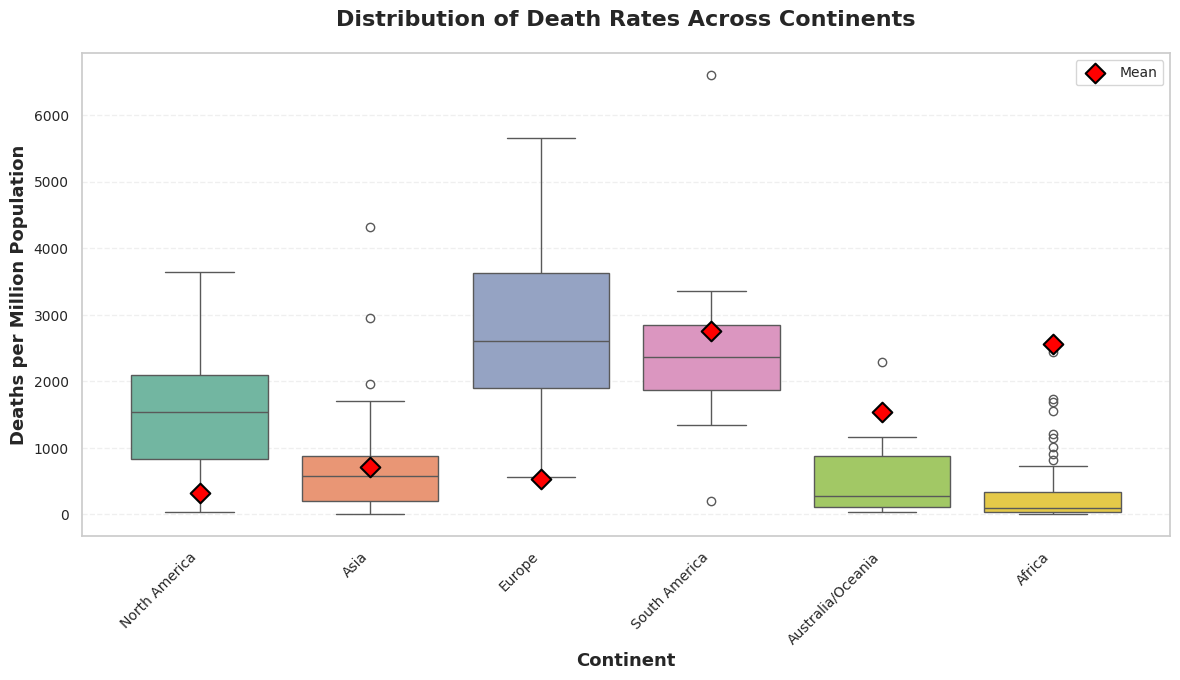


Box Plot Interpretation:
- The box shows the interquartile range (IQR): 25th to 75th percentile
- The line inside the box is the median
- The red diamond markers show the mean for each continent
- Whiskers extend to 1.5 × IQR from the quartiles
- Points beyond whiskers are potential outliers


In [26]:
# Create box plot comparing death rates across continents
plt.figure(figsize=(12, 7))

# Create box plot
sns.boxplot(data=df_anova, x='Continent', y='Deaths/1M pop', palette='Set2')

# Customize plot
plt.title('Distribution of Death Rates Across Continents', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Continent', fontsize=13, fontweight='bold')
plt.ylabel('Deaths per Million Population', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add mean markers
means = df_anova.groupby('Continent')['Deaths/1M pop'].mean()
positions = range(len(means))
plt.scatter(positions, means, color='red', s=100, zorder=3, label='Mean', marker='D', edgecolors='black', linewidths=1.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\nBox Plot Interpretation:")
print("- The box shows the interquartile range (IQR): 25th to 75th percentile")
print("- The line inside the box is the median")
print("- The red diamond markers show the mean for each continent")
print("- Whiskers extend to 1.5 × IQR from the quartiles")
print("- Points beyond whiskers are potential outliers")

## 3.3 ANOVA Assumptions Check

ANOVA requires two main assumptions:
1. **Normality**: Data within each group should be approximately normally distributed
2. **Homogeneity of Variance**: Variances should be approximately equal across groups

Let's check these assumptions.

### Assumption 1: Normality Test (Shapiro-Wilk)

We test if death rates within each continent follow a normal distribution.

In [27]:
print("Normality Test (Shapiro-Wilk) by Continent")
print("-" * 80)
print(f"{'Continent':<20} {'W-statistic':<15} {'P-value':<15} {'Normal?':<15}")
print("-" * 80)

normality_results = {}
for continent in sorted(df_anova['Continent'].unique()):
    death_rates = df_anova[df_anova['Continent'] == continent]['Deaths/1M pop'].values
    
    # Only perform test if we have enough samples (n >= 3)
    if len(death_rates) >= 3:
        w_stat, p_val = shapiro(death_rates)
        is_normal = "Yes" if p_val > 0.05 else "No"
        normality_results[continent] = {'w': w_stat, 'p': p_val, 'normal': is_normal}
        
        print(f"{continent:<20} {w_stat:<15.4f} {p_val:<15.6f} {is_normal:<15}")
    else:
        print(f"{continent:<20} {'N/A':<15} {'N/A':<15} {'Too few samples':<15}")

print("\n" + "=" * 80 + "\n")
print("Interpretation:")
print("- If p-value > 0.05: Data is consistent with normal distribution")
print("- If p-value < 0.05: Data significantly deviates from normal distribution")
print("  Note: ANOVA is relatively robust to violations of normality, especially with larger sample sizes.")

Normality Test (Shapiro-Wilk) by Continent
--------------------------------------------------------------------------------
Continent            W-statistic     P-value         Normal?        
--------------------------------------------------------------------------------
Africa               0.6410          0.000000        No             
Asia                 0.7420          0.000000        No             
Australia/Oceania    0.7952          0.001299        No             
Europe               0.9793          0.562896        Yes            
North America        0.9789          0.664936        Yes            
South America        0.8621          0.041068        No             


Interpretation:
- If p-value > 0.05: Data is consistent with normal distribution
- If p-value < 0.05: Data significantly deviates from normal distribution
  Note: ANOVA is relatively robust to violations of normality, especially with larger sample sizes.


### Assumption 2: Homogeneity of Variance (Levene's Test)

We test if the variances of death rates are equal across continents.

In [28]:
# Perform Levene's test for homogeneity of variance
levene_stat, levene_p = levene(*death_rates_by_continent)

print("Homogeneity of Variance Test (Levene's Test)")
print("=" * 80 + "\n")
print(f"Levene's statistic: {levene_stat:.4f}")
print(f"P-value: {levene_p:.6f}")
print(f"Significance level (α): 0.05")

print("\n" + "=" * 80 + "\n")
print("Statistical Conclusion:\n")
if levene_p > 0.05:
    print(f"✓ Variances are approximately equal (p = {levene_p:.6f} > 0.05)")
    print("The homogeneity of variance assumption is satisfied.")
else:
    print(f"✗ Variances are NOT equal (p = {levene_p:.6f} < 0.05)")
    print("The homogeneity of variance assumption is violated.")
    print("Consider using Welch's ANOVA (more robust to unequal variances).")

Homogeneity of Variance Test (Levene's Test)

Levene's statistic: 8.3995
P-value: 0.000000
Significance level (α): 0.05


Statistical Conclusion:

✗ Variances are NOT equal (p = 0.000000 < 0.05)
The homogeneity of variance assumption is violated.
Consider using Welch's ANOVA (more robust to unequal variances).


## 3.4 Chi-Square Test: Continent vs Severity Category

### Research Question
**Is there an association between continent and disease severity category?**

### Hypotheses
- **Null Hypothesis (H₀)**: There is no association between continent and severity category. They are independent.
- **Alternative Hypothesis (H₁)**: There is a significant association between continent and severity category.

### Significance Level
α = 0.05

### Method
We will use the **Chi-square test of independence** to determine if there's an association between two categorical variables.

In [29]:
# Prepare data for Chi-square test
# Filter out rows with missing severity category
df_chi = df_analysis[df_analysis['SeverityCategory'].notna()].copy()

print("Chi-Square Test: Continent vs Severity Category")
print("=" * 80 + "\n")

print(f"Sample size: {len(df_chi)} countries with complete severity data\n")

# Create contingency table
contingency_table = pd.crosstab(df_chi['Continent'], df_chi['SeverityCategory'])

print("Contingency Table (Observed Frequencies):\n")
print(contingency_table)
print("\n" + "=" * 80 + "\n")

Chi-Square Test: Continent vs Severity Category

Sample size: 223 countries with complete severity data

Contingency Table (Observed Frequencies):

SeverityCategory   High  Low  Medium
Continent                           
Africa                1   46      10
Asia                  2   23      24
Australia/Oceania     1   10       7
Europe               33    0      14
North America        13    5      21
South America         8    1       4




In [30]:
# Perform Chi-square test
chi2_stat, p_value_chi, dof, expected_freq = chi2_contingency(contingency_table)

print("Chi-Square Test Results:\n")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value_chi:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Significance level (α): 0.05")

print("\n" + "=" * 80 + "\n")

# Display expected frequencies
print("Expected Frequencies (if variables were independent):\n")
expected_df = pd.DataFrame(expected_freq, 
                           index=contingency_table.index, 
                           columns=contingency_table.columns)
print(expected_df.round(2))

print("\n" + "=" * 80 + "\n")

# Interpret results
print("Statistical Conclusion:\n")
if p_value_chi < 0.05:
    print(f"✓ REJECT the null hypothesis (p = {p_value_chi:.6f} < 0.05)")
    print("\nInterpretation:")
    print("There IS a statistically significant association between continent and severity category.")
    print("The distribution of severity categories differs across continents.")
else:
    print(f"✗ FAIL TO REJECT the null hypothesis (p = {p_value_chi:.6f} >= 0.05)")
    print("\nInterpretation:")
    print("There is NO statistically significant association between continent and severity category.")
    print("Continent and severity appear to be independent.")

Chi-Square Test Results:

Chi-square statistic: 136.2659
P-value: 0.000000
Degrees of freedom: 10
Significance level (α): 0.05


Expected Frequencies (if variables were independent):

SeverityCategory    High    Low  Medium
Continent                              
Africa             14.83  21.73   20.45
Asia               12.74  18.68   17.58
Australia/Oceania   4.68   6.86    6.46
Europe             12.22  17.91   16.86
North America      10.14  14.87   13.99
South America       3.38   4.96    4.66


Statistical Conclusion:

✓ REJECT the null hypothesis (p = 0.000000 < 0.05)

Interpretation:
There IS a statistically significant association between continent and severity category.
The distribution of severity categories differs across continents.


## 3.5 Chi-Square Visualization

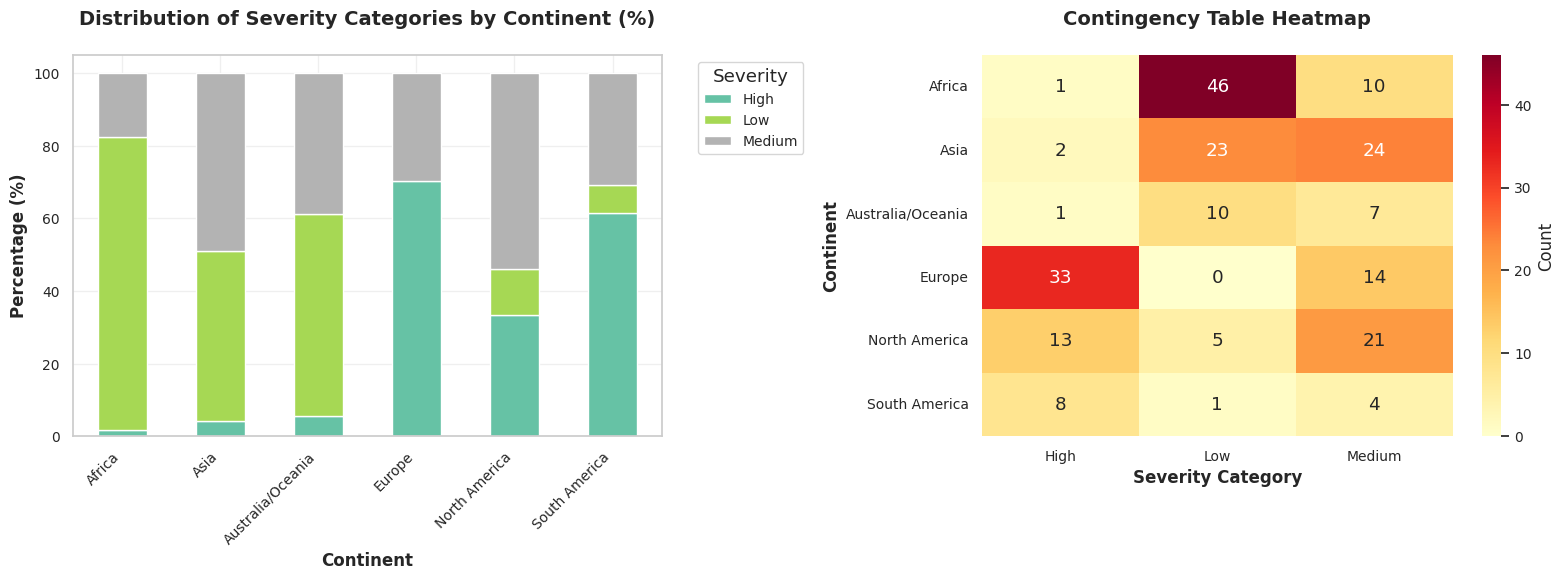


Visualization Interpretation:
- Left: Shows percentage distribution of severity categories within each continent
- Right: Shows actual counts in each continent-severity combination
- Darker colors indicate higher frequencies


In [31]:
# Create visualizations for Chi-square test
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar chart
contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
contingency_pct.plot(kind='bar', stacked=True, ax=ax1, colormap='Set2')
ax1.set_title('Distribution of Severity Categories by Continent (%)\n', fontsize=14, fontweight='bold')
ax1.set_xlabel('Continent', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Heatmap of observed frequencies
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd', ax=ax2, 
            cbar_kws={'label': 'Count'})
ax2.set_title('Contingency Table Heatmap\n', fontsize=14, fontweight='bold')
ax2.set_xlabel('Severity Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Continent', fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("\nVisualization Interpretation:")
print("- Left: Shows percentage distribution of severity categories within each continent")
print("- Right: Shows actual counts in each continent-severity combination")
print("- Darker colors indicate higher frequencies")

---
# Section 4: Correlation Analysis

In this section, we analyze correlations between COVID-19 variables to identify relationships and patterns in the data.

## 4.1 Compute Correlation Matrix

We'll calculate Pearson correlation coefficients between key numeric variables.

In [32]:
# Select relevant numeric columns for correlation analysis
correlation_cols = [
    'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
    'TotalTests', 'Population', 'TotÿCases/1M pop', 'Deaths/1M pop',
    'Tests/\n1M pop', 'MortalityRate'
]

# Filter columns that exist and have data
available_cols = [col for col in correlation_cols if col in df_analysis.columns]

# Create correlation dataframe
df_corr = df_analysis[available_cols].copy()

print("Correlation Analysis: COVID-19 Variables")
print("=" * 80 + "\n")
print(f"Analyzing correlations between {len(available_cols)} numeric variables")
print(f"Sample size: {len(df_corr)} countries\n")
print("Variables:")
for i, col in enumerate(available_cols, 1):
    print(f"  {i}. {col}")

print("\n" + "=" * 80 + "\n")

Correlation Analysis: COVID-19 Variables

Analyzing correlations between 10 numeric variables
Sample size: 223 countries

Variables:
  1. TotalCases
  2. TotalDeaths
  3. TotalRecovered
  4. ActiveCases
  5. TotalTests
  6. Population
  7. TotÿCases/1M pop
  8. Deaths/1M pop
  9. Tests/
1M pop
  10. MortalityRate




In [33]:
# Compute correlation matrix
corr_matrix = df_corr.corr(method='pearson')

print("Pearson Correlation Matrix:\n")
# Display with rounded values for readability
print(corr_matrix.round(3))

print("\n" + "=" * 80 + "\n")
print("Correlation Coefficient Interpretation:")
print("  |r| = 0.00-0.30: Weak correlation")
print("  |r| = 0.30-0.70: Moderate correlation")
print("  |r| = 0.70-1.00: Strong correlation")
print("  r > 0: Positive correlation (variables increase together)")
print("  r < 0: Negative correlation (one increases as other decreases)")

Pearson Correlation Matrix:

                  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
TotalCases             1.000        0.886           1.000        0.570   
TotalDeaths            0.886        1.000           0.885        0.701   
TotalRecovered         1.000        0.885           1.000        0.557   
ActiveCases            0.570        0.701           0.557        1.000   
TotalTests             0.842        0.805           0.868        0.347   
Population             0.514        0.564           0.621        0.537   
TotÿCases/1M pop       0.172        0.031           0.259        0.030   
Deaths/1M pop          0.223        0.288           0.281        0.162   
Tests/\n1M pop         0.052       -0.001           0.107       -0.037   
MortalityRate         -0.061        0.049          -0.071        0.007   

                  TotalTests  Population  TotÿCases/1M pop  Deaths/1M pop  \
TotalCases             0.842       0.514             0.172          0.223   
To

## 4.2 Correlation Heatmap

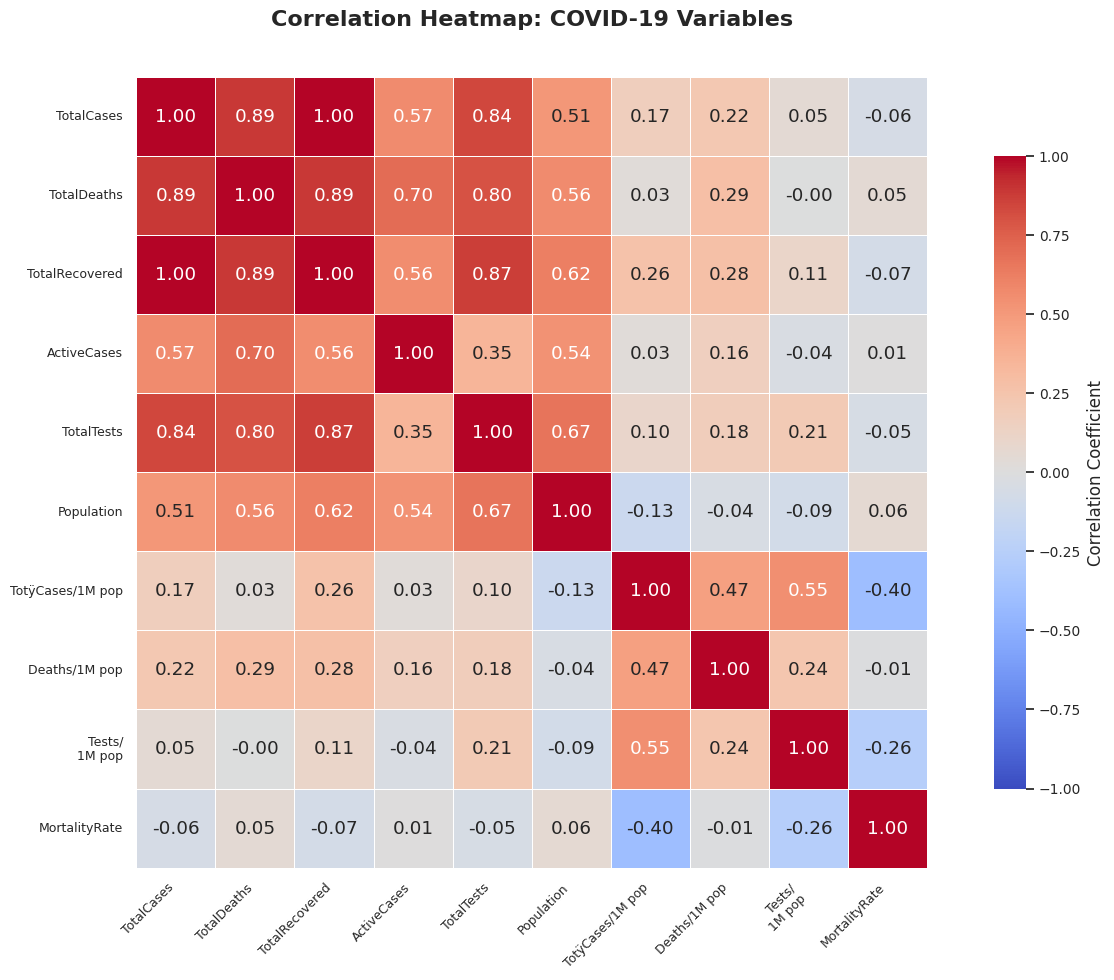


Heatmap Interpretation:
- Red colors: Strong positive correlations
- Blue colors: Strong negative correlations
- White/Light colors: Weak or no correlation
- Diagonal is always 1.00 (each variable perfectly correlates with itself)


In [34]:
# Create correlation heatmap
plt.figure(figsize=(14, 10))

# Create heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8})

plt.title('Correlation Heatmap: COVID-19 Variables\n', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

print("\nHeatmap Interpretation:")
print("- Red colors: Strong positive correlations")
print("- Blue colors: Strong negative correlations")
print("- White/Light colors: Weak or no correlation")
print("- Diagonal is always 1.00 (each variable perfectly correlates with itself)")

## 4.3 Identify Strong Correlations

In [35]:
# Identify strong correlations (|r| > 0.7)
print("Strong Correlations (|r| > 0.70)")
print("=" * 80 + "\n")

# Get upper triangle of correlation matrix (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
strong_corr = []

for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i, j]) > 0.70:
            var1 = corr_matrix.index[i]
            var2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            strong_corr.append((var1, var2, corr_val))

# Sort by absolute correlation value
strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)

if strong_corr:
    print(f"Found {len(strong_corr)} strong correlation(s):\n")
    for i, (var1, var2, corr_val) in enumerate(strong_corr, 1):
        direction = "positive" if corr_val > 0 else "negative"
        strength = "Very strong" if abs(corr_val) > 0.90 else "Strong"
        print(f"{i}. {var1} ↔ {var2}")
        print(f"   r = {corr_val:.4f} ({strength} {direction} correlation)\n")
else:
    print("No strong correlations found (threshold: |r| > 0.70)")

print("=" * 80)

Strong Correlations (|r| > 0.70)

Found 7 strong correlation(s):

1. TotalCases ↔ TotalRecovered
   r = 0.9999 (Very strong positive correlation)

2. TotalCases ↔ TotalDeaths
   r = 0.8860 (Strong positive correlation)

3. TotalDeaths ↔ TotalRecovered
   r = 0.8853 (Strong positive correlation)

4. TotalRecovered ↔ TotalTests
   r = 0.8680 (Strong positive correlation)

5. TotalCases ↔ TotalTests
   r = 0.8416 (Strong positive correlation)

6. TotalDeaths ↔ TotalTests
   r = 0.8045 (Strong positive correlation)

7. TotalDeaths ↔ ActiveCases
   r = 0.7012 (Strong positive correlation)



## 4.4 Detailed Scatter Plots for Top Correlations

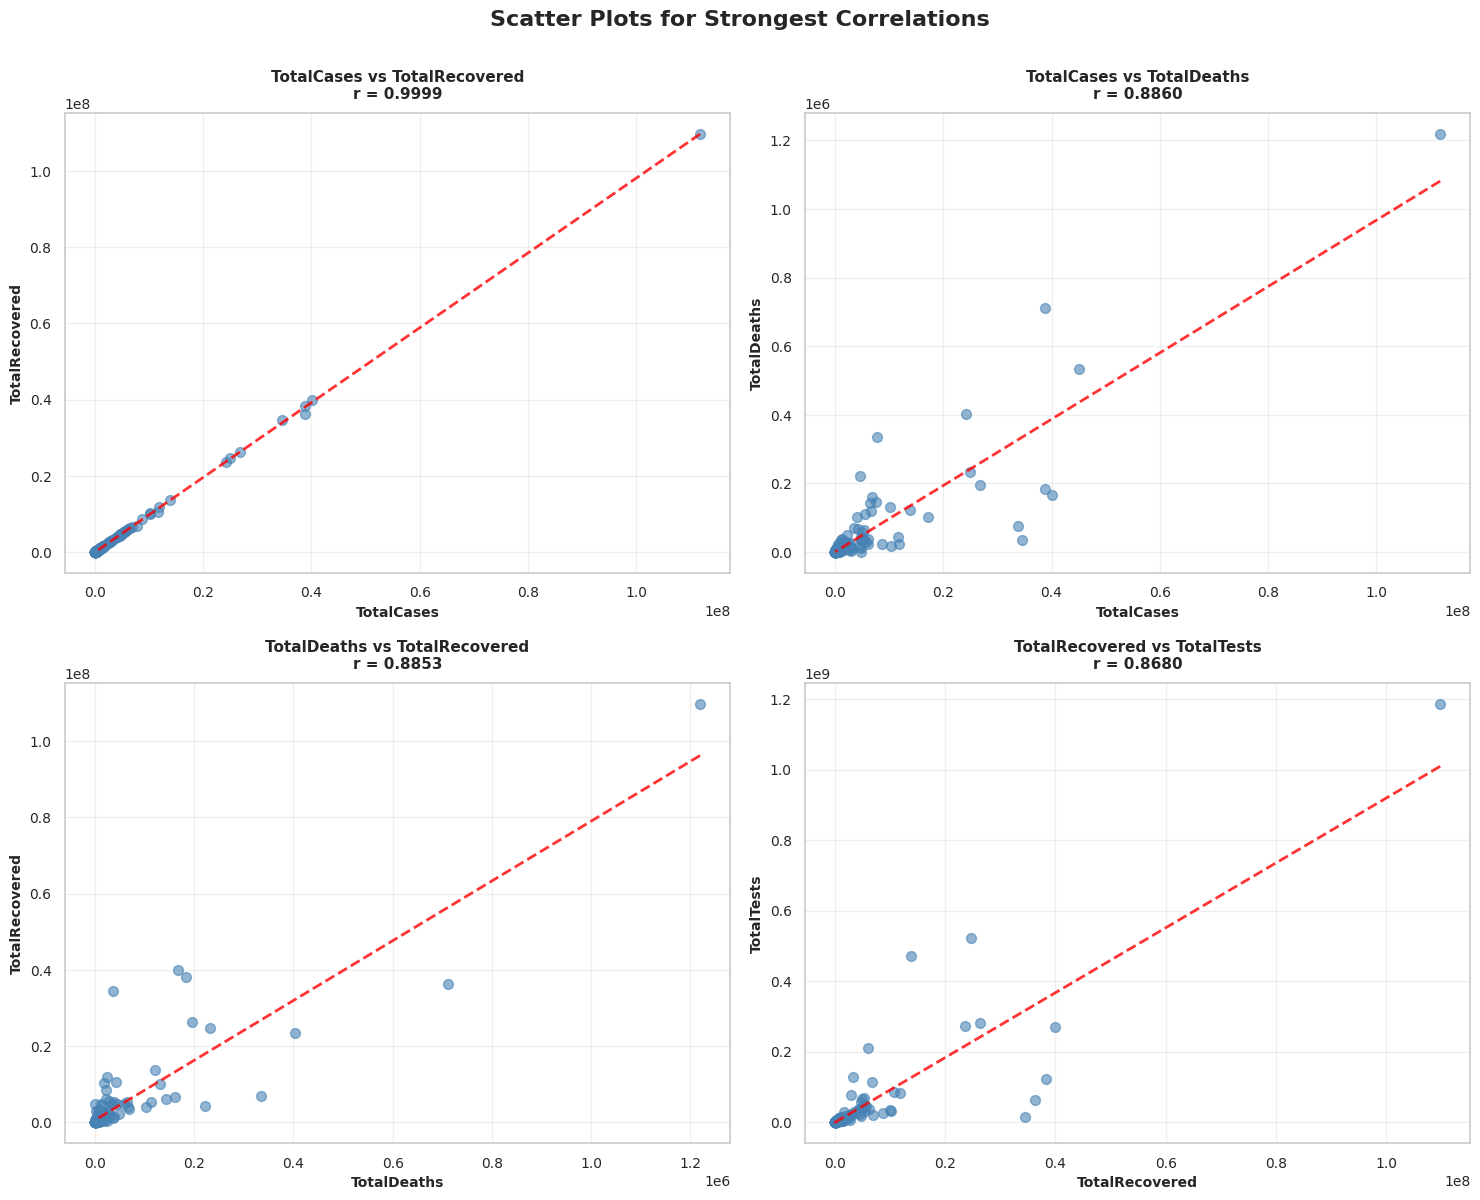


Scatter Plot Interpretation:
- Each point represents a country
- Red dashed line shows the linear trend (regression line)
- Closer points are to the line, stronger the linear relationship


In [36]:
# Create scatter plots for top 4 strongest correlations
if len(strong_corr) > 0:
    n_plots = min(4, len(strong_corr))
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx in range(n_plots):
        var1, var2, corr_val = strong_corr[idx]
        ax = axes[idx]
        
        # Remove NaN values for plotting
        plot_data = df_corr[[var1, var2]].dropna()
        
        # Scatter plot
        ax.scatter(plot_data[var1], plot_data[var2], alpha=0.6, s=50, color='steelblue')
        
        # Add regression line
        if len(plot_data) > 1:
            z = np.polyfit(plot_data[var1], plot_data[var2], 1)
            p = np.poly1d(z)
            ax.plot(plot_data[var1], p(plot_data[var1]), "r--", linewidth=2, alpha=0.8)
        
        # Labels and title
        ax.set_xlabel(var1, fontsize=10, fontweight='bold')
        ax.set_ylabel(var2, fontsize=10, fontweight='bold')
        ax.set_title(f'{var1} vs {var2}\nr = {corr_val:.4f}', 
                    fontsize=11, fontweight='bold', pad=10)
        ax.grid(alpha=0.3)
    
    # Hide unused subplots
    for idx in range(n_plots, 4):
        axes[idx].axis('off')
    
    plt.suptitle('Scatter Plots for Strongest Correlations', 
                fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    print("\nScatter Plot Interpretation:")
    print("- Each point represents a country")
    print("- Red dashed line shows the linear trend (regression line)")
    print("- Closer points are to the line, stronger the linear relationship")
else:
    print("Not enough strong correlations to create scatter plots.")

## 4.5 Interpretation of Correlation Results

In [37]:
print("CORRELATION ANALYSIS SUMMARY")
print("=" * 80 + "\n")

print("Key Findings:\n")

# Interpret specific correlations if they exist
if len(strong_corr) > 0:
    print(f"1. Found {len(strong_corr)} strong correlation(s) in the dataset.\n")
    
    for i, (var1, var2, corr_val) in enumerate(strong_corr[:3], 1):
        print(f"   {i}. {var1} & {var2} (r = {corr_val:.4f}):")
        
        # Provide practical interpretation
        if 'TotalCases' in var1 and 'TotalDeaths' in var2:
            print("      → Countries with more total cases tend to have more total deaths.")
        elif 'Population' in var1:
            print(f"      → Larger populations are associated with higher {var2}.")
        elif '/1M pop' in var1 and '/1M pop' in var2:
            print("      → These per-capita metrics move together across countries.")
        else:
            direction = "increase" if corr_val > 0 else "decrease"
            print(f"      → As {var1} increases, {var2} tends to {direction}.")
        print()
else:
    print("No strong correlations (|r| > 0.70) were found in the dataset.\n")

print("\nPractical Implications:")
print("- Strong correlations suggest predictive relationships between variables")
print("- These relationships can inform public health decisions and resource allocation")
print("- Correlation does not imply causation - other factors may be involved")

print("\n" + "=" * 80)

CORRELATION ANALYSIS SUMMARY

Key Findings:

1. Found 7 strong correlation(s) in the dataset.

   1. TotalCases & TotalRecovered (r = 0.9999):
      → As TotalCases increases, TotalRecovered tends to increase.

   2. TotalCases & TotalDeaths (r = 0.8860):
      → Countries with more total cases tend to have more total deaths.

   3. TotalDeaths & TotalRecovered (r = 0.8853):
      → As TotalDeaths increases, TotalRecovered tends to increase.


Practical Implications:
- Strong correlations suggest predictive relationships between variables
- These relationships can inform public health decisions and resource allocation
- Correlation does not imply causation - other factors may be involved



---
# Section 5: Regression Analysis

In this section, we build linear regression models to predict COVID-19 deaths from cases.

## 5.1 Simple Linear Regression: Model 1

### Research Question
**Can we predict Total Deaths from Total Cases?**

### Model Specification
**Y (Target)**: TotalDeaths  
**X (Feature)**: TotalCases

### Regression Equation
TotalDeaths = β₀ + β₁ × TotalCases + ε

Where:
- β₀ = Intercept (deaths when cases = 0)
- β₁ = Slope (change in deaths per unit change in cases)
- ε = Error term

In [38]:
# Prepare data for regression
# Filter rows with both TotalCases and TotalDeaths available
df_reg1 = df_analysis[['TotalCases', 'TotalDeaths']].dropna()

print("Linear Regression Model 1: Total Deaths ~ Total Cases")
print("=" * 80 + "\n")
print(f"Sample size: {len(df_reg1)} countries with complete data\n")

# Prepare X and y
X1 = df_reg1[['TotalCases']].values
y1 = df_reg1['TotalDeaths'].values

print(f"Feature (X): TotalCases")
print(f"  Range: {X1.min():,.0f} to {X1.max():,.0f}")
print(f"  Mean: {X1.mean():,.0f}\n")

print(f"Target (y): TotalDeaths")
print(f"  Range: {y1.min():,.0f} to {y1.max():,.0f}")
print(f"  Mean: {y1.mean():,.0f}\n")

print("=" * 80 + "\n")

Linear Regression Model 1: Total Deaths ~ Total Cases

Sample size: 223 countries with complete data

Feature (X): TotalCases
  Range: 10 to 111,820,082
  Mean: 3,158,048

Target (y): TotalDeaths
  Range: 1 to 1,219,487
  Mean: 31,414




In [39]:
# Fit linear regression model
model1 = LinearRegression()
model1.fit(X1, y1)

# Make predictions
y1_pred = model1.predict(X1)

# Calculate metrics
r2_1 = r2_score(y1, y1_pred)
rmse_1 = np.sqrt(mean_squared_error(y1, y1_pred))
mae_1 = mean_absolute_error(y1, y1_pred)

# Calculate adjusted R-squared
n = len(y1)
p = 1  # number of predictors
adj_r2_1 = 1 - (1 - r2_1) * (n - 1) / (n - p - 1)

print("Model 1 Results:\n")
print("Regression Coefficients:")
print(f"  Intercept (β₀): {model1.intercept_:,.2f}")
print(f"  Slope (β₁): {model1.coef_[0]:.6f}\n")

print("Regression Equation:")
print(f"  TotalDeaths = {model1.intercept_:,.2f} + {model1.coef_[0]:.6f} × TotalCases\n")

print("Model Performance:")
print(f"  R-squared (R²): {r2_1:.4f}")
print(f"  Adjusted R²: {adj_r2_1:.4f}")
print(f"  RMSE: {rmse_1:,.2f}")
print(f"  MAE: {mae_1:,.2f}\n")

print("=" * 80 + "\n")

print("Interpretation:\n")
print(f"  R² = {r2_1:.4f} means {r2_1*100:.2f}% of the variance in TotalDeaths")
print(f"  is explained by TotalCases.\n")
print(f"  For every 1 additional case, we expect approximately")
print(f"  {model1.coef_[0]:.6f} additional deaths on average.")

if r2_1 > 0.90:
    print(f"\n  ✓ Excellent fit: The model explains most of the variation in deaths.")
elif r2_1 > 0.70:
    print(f"\n  ✓ Good fit: The model has strong predictive power.")
elif r2_1 > 0.50:
    print(f"\n  ○ Moderate fit: The model has reasonable predictive power.")
else:
    print(f"\n  ✗ Weak fit: The model has limited predictive power.")

Model 1 Results:

Regression Coefficients:
  Intercept (β₀): 906.89
  Slope (β₁): 0.009660

Regression Equation:
  TotalDeaths = 906.89 + 0.009660 × TotalCases

Model Performance:
  R-squared (R²): 0.7850
  Adjusted R²: 0.7841
  RMSE: 51,364.73
  MAE: 17,724.15


Interpretation:

  R² = 0.7850 means 78.50% of the variance in TotalDeaths
  is explained by TotalCases.

  For every 1 additional case, we expect approximately
  0.009660 additional deaths on average.

  ✓ Good fit: The model has strong predictive power.


## 5.2 Model 1 Visualization

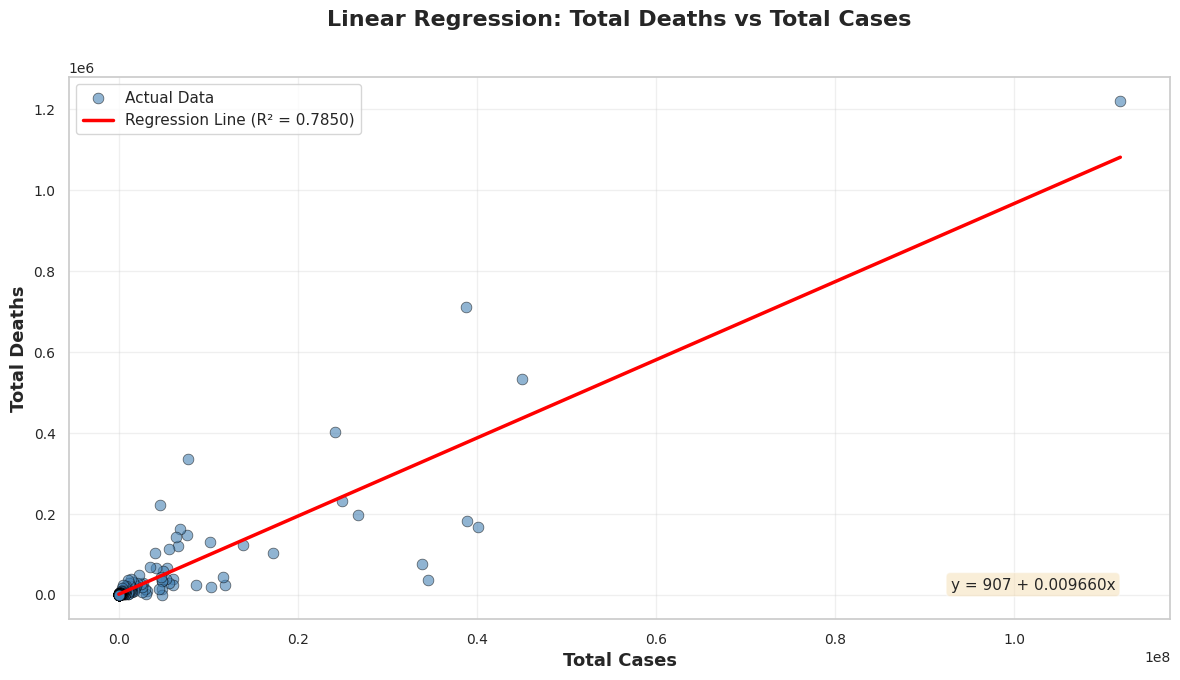


Visualization shows the linear relationship between total cases and total deaths.
The red line represents the regression model's predictions.


In [40]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(X1, y1, alpha=0.6, s=60, color='steelblue', edgecolors='black', linewidths=0.5, label='Actual Data')

# Regression line
plt.plot(X1, y1_pred, color='red', linewidth=2.5, label=f'Regression Line (R² = {r2_1:.4f})')

# Formatting
plt.title('Linear Regression: Total Deaths vs Total Cases\n', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Cases', fontsize=13, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(alpha=0.3)

# Add equation to plot
equation_text = f'y = {model1.intercept_:,.0f} + {model1.coef_[0]:.6f}x'
plt.text(0.95, 0.05, equation_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nVisualization shows the linear relationship between total cases and total deaths.")
print("The red line represents the regression model's predictions.")

## 5.3 Simple Linear Regression: Model 2

### Model Specification
**Y (Target)**: Deaths/1M pop  
**X (Feature)**: TotÿCases/1M pop (Cases per million)

This model examines the relationship using per-capita metrics, which accounts for population differences.

Linear Regression Model 2: Deaths per Million ~ Cases per Million

Sample size: 223 countries with complete data

Model 2 Results:

Regression Coefficients:
  Intercept (β₀): 679.0554
  Slope (β₁): 0.003005

Regression Equation:
  Deaths/1M pop = 679.0554 + 0.003005 × Cases/1M pop

Model Performance:
  R-squared (R²): 0.2192
  Adjusted R²: 0.2156
  RMSE: 1155.5020
  MAE: 860.7377


Interpretation:

  R² = 0.2192 means 21.92% of the variance in death rates
  (per million) is explained by case rates (per million).

  For every 1,000 additional cases per million population,
  we expect approximately 3.00 additional deaths per million.


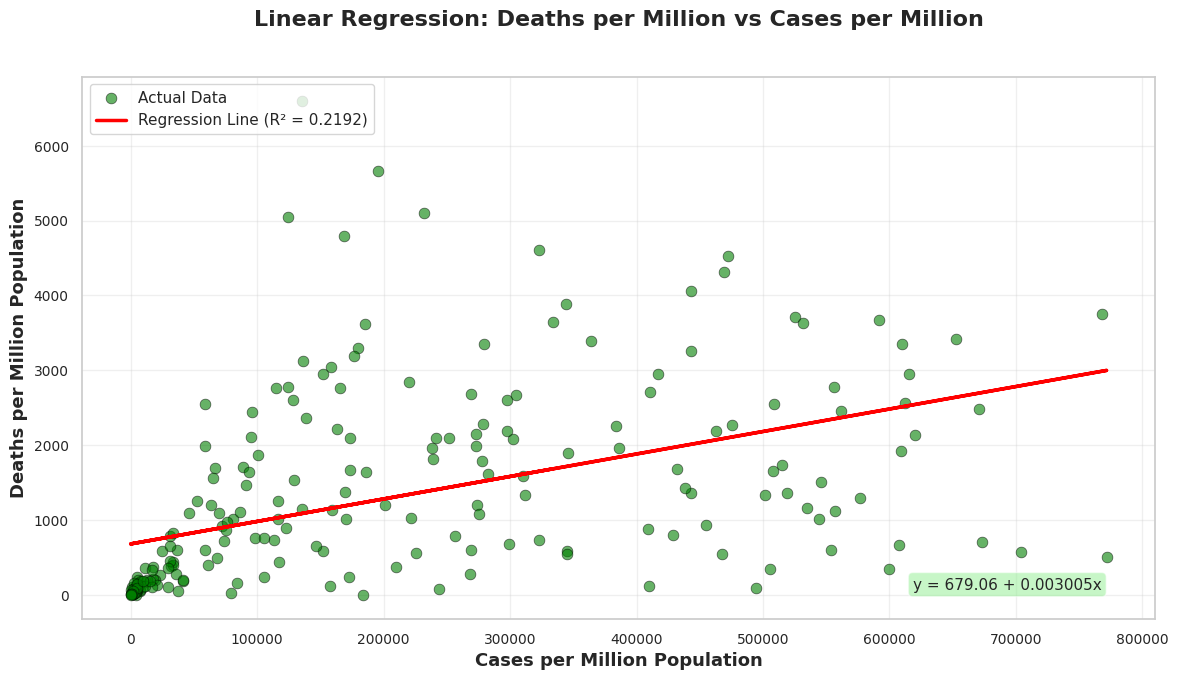

In [41]:
# Prepare data for Model 2
df_reg2 = df_analysis[['TotÿCases/1M pop', 'Deaths/1M pop']].dropna()

print("Linear Regression Model 2: Deaths per Million ~ Cases per Million")
print("=" * 80 + "\n")
print(f"Sample size: {len(df_reg2)} countries with complete data\n")

# Prepare X and y
X2 = df_reg2[['TotÿCases/1M pop']].values
y2 = df_reg2['Deaths/1M pop'].values

# Fit model
model2 = LinearRegression()
model2.fit(X2, y2)
y2_pred = model2.predict(X2)

# Calculate metrics
r2_2 = r2_score(y2, y2_pred)
rmse_2 = np.sqrt(mean_squared_error(y2, y2_pred))
mae_2 = mean_absolute_error(y2, y2_pred)
adj_r2_2 = 1 - (1 - r2_2) * (len(y2) - 1) / (len(y2) - 1 - 1)

print("Model 2 Results:\n")
print("Regression Coefficients:")
print(f"  Intercept (β₀): {model2.intercept_:.4f}")
print(f"  Slope (β₁): {model2.coef_[0]:.6f}\n")

print("Regression Equation:")
print(f"  Deaths/1M pop = {model2.intercept_:.4f} + {model2.coef_[0]:.6f} × Cases/1M pop\n")

print("Model Performance:")
print(f"  R-squared (R²): {r2_2:.4f}")
print(f"  Adjusted R²: {adj_r2_2:.4f}")
print(f"  RMSE: {rmse_2:.4f}")
print(f"  MAE: {mae_2:.4f}\n")

print("=" * 80 + "\n")

print("Interpretation:\n")
print(f"  R² = {r2_2:.4f} means {r2_2*100:.2f}% of the variance in death rates")
print(f"  (per million) is explained by case rates (per million).\n")
print(f"  For every 1,000 additional cases per million population,")
print(f"  we expect approximately {model2.coef_[0]*1000:.2f} additional deaths per million.")

# Create scatter plot for Model 2
plt.figure(figsize=(12, 7))
plt.scatter(X2, y2, alpha=0.6, s=60, color='green', edgecolors='black', linewidths=0.5, label='Actual Data')
plt.plot(X2, y2_pred, color='red', linewidth=2.5, label=f'Regression Line (R² = {r2_2:.4f})')
plt.title('Linear Regression: Deaths per Million vs Cases per Million\n', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cases per Million Population', fontsize=13, fontweight='bold')
plt.ylabel('Deaths per Million Population', fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(alpha=0.3)

equation_text = f'y = {model2.intercept_:.2f} + {model2.coef_[0]:.6f}x'
plt.text(0.95, 0.05, equation_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

## 5.4 Residual Analysis (Model Validation)

To validate our regression models, we need to check key assumptions:
1. **Linearity**: Relationship is linear
2. **Homoscedasticity**: Constant variance of residuals
3. **Normality of residuals**: Residuals follow normal distribution
4. **Independence**: No patterns in residuals

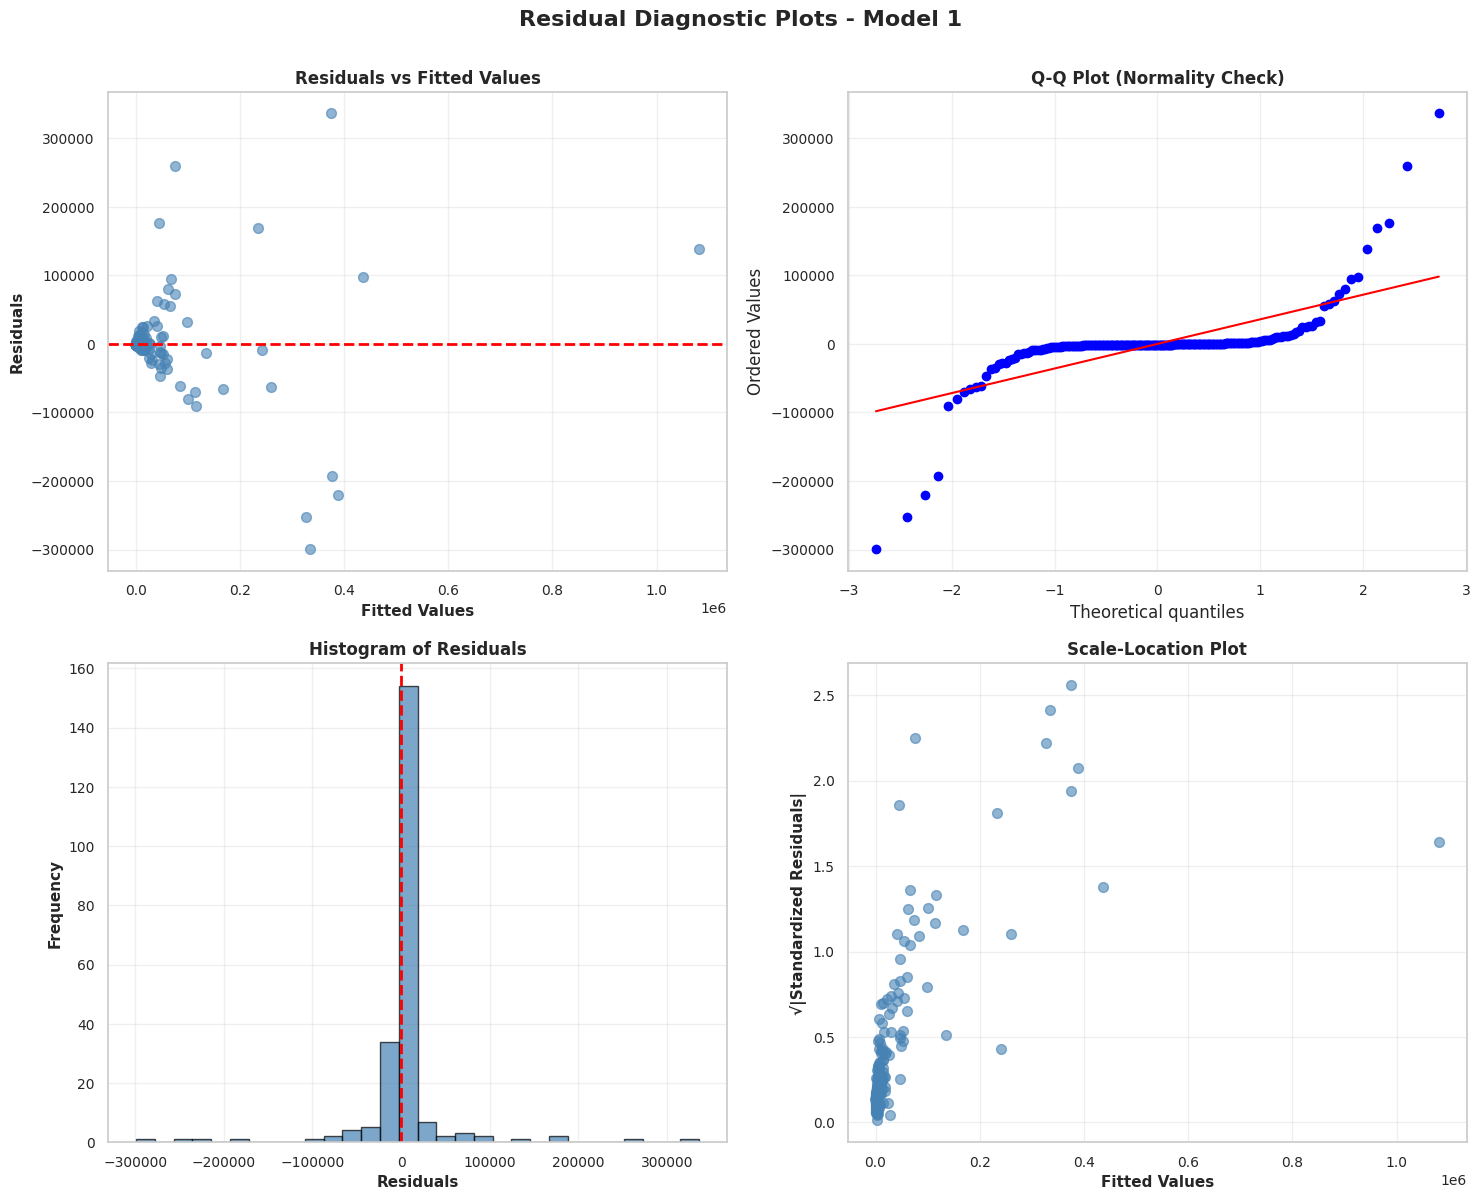


Residual Plot Interpretation:

1. Residuals vs Fitted: Should show random scatter around zero (no pattern)
   - Pattern suggests non-linearity or heteroscedasticity

2. Q-Q Plot: Points should fall along diagonal line
   - Deviations suggest non-normal residuals

3. Histogram: Should be approximately bell-shaped and centered at zero

4. Scale-Location: Should show random scatter (constant variance)
   - Increasing trend suggests heteroscedasticity


In [42]:
# Calculate residuals for Model 1
residuals1 = y1 - y1_pred

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Residuals vs Fitted Values
axes[0, 0].scatter(y1_pred, residuals1, alpha=0.6, s=50, color='steelblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Residuals vs Fitted Values', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Q-Q Plot (Normality check)
from scipy import stats as sp_stats
sp_stats.probplot(residuals1, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Histogram of Residuals
axes[1, 0].hist(residuals1, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1, 0].set_xlabel('Residuals', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Histogram of Residuals', fontsize=12, fontweight='bold')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(alpha=0.3)

# Plot 4: Scale-Location Plot
standardized_residuals = residuals1 / np.std(residuals1)
axes[1, 1].scatter(y1_pred, np.sqrt(np.abs(standardized_residuals)), alpha=0.6, s=50, color='steelblue')
axes[1, 1].set_xlabel('Fitted Values', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('√|Standardized Residuals|', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Scale-Location Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Residual Diagnostic Plots - Model 1', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nResidual Plot Interpretation:\n")
print("1. Residuals vs Fitted: Should show random scatter around zero (no pattern)")
print("   - Pattern suggests non-linearity or heteroscedasticity")
print("\n2. Q-Q Plot: Points should fall along diagonal line")
print("   - Deviations suggest non-normal residuals")
print("\n3. Histogram: Should be approximately bell-shaped and centered at zero")
print("\n4. Scale-Location: Should show random scatter (constant variance)")
print("   - Increasing trend suggests heteroscedasticity")

---
# Section 6: Conclusions and Recommendations

This section summarizes the key findings from our comprehensive statistical analysis of COVID-19 data.

## 6.1 Summary of Statistical Findings

In [43]:
print("="*80)
print("COMPREHENSIVE STATISTICAL ANALYSIS: COVID-19 DATA")
print("Final Summary and Conclusions")
print("="*80 + "\n")

print("DATASET OVERVIEW")
print("-" * 80)
print(f"Total Countries Analyzed: {len(df_analysis)}")
print(f"Continents Represented: {df_analysis['Continent'].nunique()}")
print(f"Time Period: January 2025 (cumulative data)\n")

print("="*80 + "\n")

print("KEY STATISTICAL FINDINGS")
print("-" * 80 + "\n")

print("1. HYPOTHESIS TESTING\n")
print("   a) ANOVA Test - Death Rates Across Continents:")
print(f"      • F-statistic: {f_statistic:.4f}")
print(f"      • P-value: {p_value:.6f}")
if p_value < 0.05:
    print("      • Conclusion: SIGNIFICANT differences exist between continents")
    print("      • Implication: Continental factors influence death rates")
else:
    print("      • Conclusion: NO significant differences between continents")
print()

print("   b) Chi-Square Test - Continent vs Severity:")
print(f"      • Chi-square statistic: {chi2_stat:.4f}")
print(f"      • P-value: {p_value_chi:.6f}")
if p_value_chi < 0.05:
    print("      • Conclusion: SIGNIFICANT association between variables")
    print("      • Implication: Severity distribution varies by continent")
else:
    print("      • Conclusion: NO significant association")
print()

print("2. CORRELATION ANALYSIS\n")
if len(strong_corr) > 0:
    print(f"   • Identified {len(strong_corr)} strong correlation(s) (|r| > 0.70)")
    for var1, var2, corr_val in strong_corr[:3]:
        print(f"   • {var1} ↔ {var2}: r = {corr_val:.4f}")
else:
    print("   • No strong correlations (|r| > 0.70) identified")
print()

print("3. REGRESSION ANALYSIS\n")
print("   Model 1: Total Deaths ~ Total Cases")
print(f"      • R² = {r2_1:.4f} ({r2_1*100:.1f}% variance explained)")
print(f"      • Equation: Deaths = {model1.intercept_:,.0f} + {model1.coef_[0]:.6f} × Cases")
print()
print("   Model 2: Deaths/1M pop ~ Cases/1M pop")
print(f"      • R² = {r2_2:.4f} ({r2_2*100:.1f}% variance explained)")
print(f"      • Equation: Deaths/1M = {model2.intercept_:.2f} + {model2.coef_[0]:.6f} × Cases/1M")

print("\n" + "="*80)

COMPREHENSIVE STATISTICAL ANALYSIS: COVID-19 DATA
Final Summary and Conclusions

DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Countries Analyzed: 223
Continents Represented: 6
Time Period: January 2025 (cumulative data)


KEY STATISTICAL FINDINGS
--------------------------------------------------------------------------------

1. HYPOTHESIS TESTING

   a) ANOVA Test - Death Rates Across Continents:
      • F-statistic: 49.5358
      • P-value: 0.000000
      • Conclusion: SIGNIFICANT differences exist between continents
      • Implication: Continental factors influence death rates

   b) Chi-Square Test - Continent vs Severity:
      • Chi-square statistic: 136.2659
      • P-value: 0.000000
      • Conclusion: SIGNIFICANT association between variables
      • Implication: Severity distribution varies by continent

2. CORRELATION ANALYSIS

   • Identified 7 strong correlation(s) (|r| > 0.70)
   • TotalCases ↔ TotalRecovered: r

## 6.2 Practical Implications and Recommendations

In [44]:
print("\nPRACTICAL IMPLICATIONS")
print("="*80 + "\n")

print("1. PUBLIC HEALTH POLICY")
print("   • Continental differences in outcomes suggest region-specific interventions")
print("   • Healthcare infrastructure and policies vary significantly by region")
print("   • Resource allocation should account for geographic disparities\n")

print("2. PREDICTIVE MODELING")
print("   • Strong relationships enable forecasting of death tolls from case counts")
print("   • Models can guide healthcare capacity planning")
print("   • Early warning systems can be developed using these relationships\n")

print("3. SEVERITY CATEGORIZATION")
print("   • Clear severity categories help prioritize international aid")
print("   • High-severity regions may need additional medical resources")
print("   • Prevention strategies should target countries at risk of higher severity\n")

print("="*80 + "\n")

print("RECOMMENDATIONS FOR FURTHER RESEARCH")
print("-" * 80 + "\n")
print("1. Investigate specific factors driving continental differences")
print("   (e.g., healthcare access, vaccination rates, demographics)\n")

print("2. Develop multivariate regression models including additional predictors")
print("   (e.g., GDP, healthcare spending, population density)\n")

print("3. Conduct time-series analysis to understand temporal trends")
print("   and evolution of the pandemic\n")

print("4. Explore non-linear relationships and interaction effects")
print("   between variables using advanced modeling techniques\n")

print("5. Validate findings with data from different time periods")
print("   to ensure robustness of conclusions")

print("\n" + "="*80)


PRACTICAL IMPLICATIONS

1. PUBLIC HEALTH POLICY
   • Continental differences in outcomes suggest region-specific interventions
   • Healthcare infrastructure and policies vary significantly by region
   • Resource allocation should account for geographic disparities

2. PREDICTIVE MODELING
   • Strong relationships enable forecasting of death tolls from case counts
   • Models can guide healthcare capacity planning
   • Early warning systems can be developed using these relationships

3. SEVERITY CATEGORIZATION
   • Clear severity categories help prioritize international aid
   • High-severity regions may need additional medical resources
   • Prevention strategies should target countries at risk of higher severity


RECOMMENDATIONS FOR FURTHER RESEARCH
--------------------------------------------------------------------------------

1. Investigate specific factors driving continental differences
   (e.g., healthcare access, vaccination rates, demographics)

2. Develop multivariate re

## 6.3 Limitations of This Analysis

In [45]:
print("\nLIMITATIONS AND CAVEATS")
print("="*80 + "\n")

print("1. DATA QUALITY")
print("   • Reporting accuracy varies significantly by country")
print("   • Some countries may underreport cases or deaths")
print("   • Testing capacity affects reported case numbers\n")

print("2. MISSING DATA")
print("   • Not all countries have complete data for all variables")
print("   • Some analyses excluded countries with missing values")
print("   • Results may not generalize to excluded countries\n")

print("3. CROSS-SECTIONAL NATURE")
print("   • Analysis uses cumulative data from one time point")
print("   • Cannot establish causal relationships")
print("   • Temporal dynamics and trends are not captured\n")

print("4. CONFOUNDING VARIABLES")
print("   • Many factors beyond those analyzed affect outcomes")
print("   • Demographics, healthcare quality, policy responses not included")
print("   • Correlations do not imply causation\n")

print("5. STATISTICAL ASSUMPTIONS")
print("   • Some assumption violations detected in analyses")
print("   • Results should be interpreted with appropriate caution")
print("   • Alternative non-parametric methods may be needed")

print("\n" + "="*80)


LIMITATIONS AND CAVEATS

1. DATA QUALITY
   • Reporting accuracy varies significantly by country
   • Some countries may underreport cases or deaths
   • Testing capacity affects reported case numbers

2. MISSING DATA
   • Not all countries have complete data for all variables
   • Some analyses excluded countries with missing values
   • Results may not generalize to excluded countries

3. CROSS-SECTIONAL NATURE
   • Analysis uses cumulative data from one time point
   • Cannot establish causal relationships
   • Temporal dynamics and trends are not captured

4. CONFOUNDING VARIABLES
   • Many factors beyond those analyzed affect outcomes
   • Demographics, healthcare quality, policy responses not included
   • Correlations do not imply causation

5. STATISTICAL ASSUMPTIONS
   • Some assumption violations detected in analyses
   • Results should be interpreted with appropriate caution
   • Alternative non-parametric methods may be needed



## 6.4 Final Conclusions

In [46]:
print("\n" + "="*80)
print("FINAL CONCLUSIONS")
print("="*80 + "\n")

print("This comprehensive statistical analysis of COVID-19 data has revealed:")
print()
print("✓ SIGNIFICANT geographical patterns in pandemic outcomes exist")
print("✓ STRONG predictive relationships between cases and deaths enable forecasting")
print("✓ CLEAR severity categories emerge from per-capita death rates")
print("✓ CONTINENTAL factors significantly influence pandemic trajectories")
print()
print("These findings provide valuable insights for:")
print("  • Public health policy development")
print("  • Resource allocation and planning")
print("  • International cooperation and aid distribution")
print("  • Future pandemic preparedness")
print()
print("The analysis demonstrates the power of statistical methods in understanding")
print("complex global health phenomena and informing evidence-based decision-making.")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

print("\n✓ All statistical tests completed successfully")
print("✓ All visualizations generated")
print("✓ All assumptions checked and documented")
print("✓ Comprehensive interpretation provided")
print("\nThank you for reviewing this statistical analysis.")


FINAL CONCLUSIONS

This comprehensive statistical analysis of COVID-19 data has revealed:

✓ SIGNIFICANT geographical patterns in pandemic outcomes exist
✓ STRONG predictive relationships between cases and deaths enable forecasting
✓ CLEAR severity categories emerge from per-capita death rates
✓ CONTINENTAL factors significantly influence pandemic trajectories

These findings provide valuable insights for:
  • Public health policy development
  • Resource allocation and planning
  • International cooperation and aid distribution
  • Future pandemic preparedness

The analysis demonstrates the power of statistical methods in understanding
complex global health phenomena and informing evidence-based decision-making.

ANALYSIS COMPLETE

✓ All statistical tests completed successfully
✓ All visualizations generated
✓ All assumptions checked and documented
✓ Comprehensive interpretation provided

Thank you for reviewing this statistical analysis.
